In [ ]:
from keras.engine.data_adapter import random
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from glob import glob 
import cv2
import numpy as np
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,utils
# To check if GPU is active
from tensorflow.python.client import device_lib
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import random

In [ ]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6482154590377754564
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14343274496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9236872848573752877
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
asl = ("/content/drive/MyDrive/asl_data")

In [14]:
import os

folder_list = [folder for folder in os.listdir(asl) if os.path.isdir(os.path.join(asl, folder))]


In [15]:
print(folder_list)

['r', 'i', '9', 'n', 'z', 'g', 'u', '0', '6', '7', '8', '1', 't', 'a', 's', 'f', 'h', 'm', 'o', 'j', 'c', 'd', 'v', 'q', 'x', 'e', '3', '4', 'b', 'l', '2', 'y', '5', 'k', 'p', 'w']


Function to plot pictures 

In [16]:
# def visualize_images(images, labels):
#     # Create a figure with 3 rows and 5 columns
#     fig, axes = plt.subplots(nrows=5, ncols=20, figsize=(20, 20))
    
#     # Flatten the axes array for easier indexing
#     axes = axes.flatten()
    
#     # Loop over the first 15 images in the dataset
#     for i in range(len(images)):
#         # Get the i-th image and its label
#         img = images[i]
#         label = labels[i]
        
#         # Display the image using OpenCV
#         axes[i].imshow(img, cmap='gray')
#         axes[i].set_title(f"Label: {label}")
#         axes[i].axis('off')
    
#     # Show the plot
#     plt.show()

Plot all in an array 

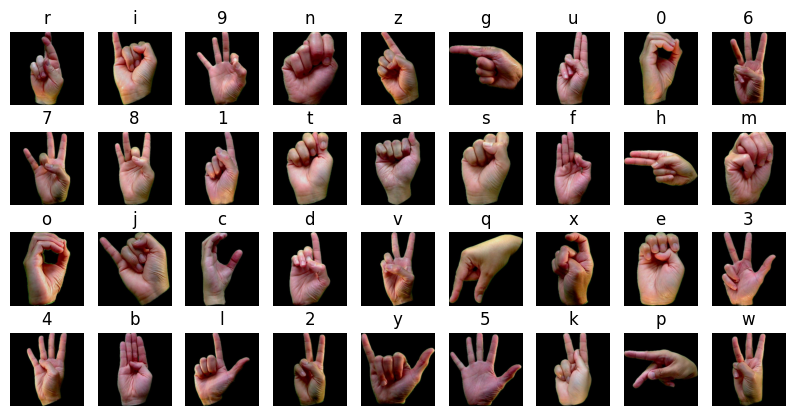

In [17]:
import os
import matplotlib.pyplot as plt

# Define the path to the directory containing the folders
path = "/content/drive/MyDrive/asl_data"

fig, ax = plt.subplots(4, 9, figsize=(10, 5))

img_classes = [os.path.join(path, im) for im in os.listdir(path)]

ax = ax.flatten()

for i, img_class in enumerate(img_classes):
    img = os.listdir(img_class)[np.random.randint(0, 10)]
    img_path = os.path.join(img_class, img)
    image = cv2.imread(img_path)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].set_title(os.path.basename(img_class))
    ax[i].axis('off')

plt.show()

Work code print all images from all folders 

In [18]:
# for folder in folder_list:
#   folder_path= os.path.join(asl,folder)
#   image_files= [file for file in os.listdir(folder_path) if file.endswith(".jpeg") or file.endswith(".jpg")]

#   for image in image_files:
#     image_path= os.path.join(folder_path,image)
#     image= plt.imread(image_path)
#     plt.imshow(image)
#     plt.title(folder)
#     plt.show()

In [19]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        #print("Retrieving images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(asl)

In [20]:
print(len(X), len(y))

2515 2515


In [21]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    X_train, X_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.6)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocess_data(X, y)

In [22]:
print("Training data:", X_train.shape)
print("Test data:", X_test.shape)

Training data: (1006, 32, 32, 3)
Test data: (1509, 32, 32, 3)


In [23]:
print("Training data:", y_train.shape)
print("Test data:", y_test.shape)

Training data: (1006, 36)
Test data: (1509, 36)


In [24]:
classes = 36
batch = 32
epochs = 4
learning_rate = 0.20

In [25]:
# model = Sequential()

# model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

# model.add(Flatten())
# model.add(Dropout(0.2))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(classes, activation='softmax'))

In [26]:
def create_cnn_model():
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3,3),padding='same',activation="relu", input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(classes, activation="softmax")
    ])
    
    return model


model = create_cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 36)                4

In [27]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping( monitor='val_loss', 
                                                   patience=3, 
                                                   mode='min', 
                                                   restore_best_weights=True)

In [29]:
history = model.fit(X_train, y_train, epochs=6,batch_size=batch, validation_data=(X_test, y_test), shuffle = True, verbose=1)

Epoch 1/6
32/32 [==============================] - 10s 17ms/step - loss: 1.8419 - accuracy: 0.5487 - val_loss: 2.7718 - val_accuracy: 0.5626
Epoch 2/6
32/32 [==============================] - 0s 8ms/step - loss: 0.3217 - accuracy: 0.9006 - val_loss: 2.4659 - val_accuracy: 0.7753
Epoch 3/6
32/32 [==============================] - 0s 8ms/step - loss: 0.1130 - accuracy: 0.9662 - val_loss: 2.2456 - val_accuracy: 0.7840
Epoch 4/6
32/32 [==============================] - 0s 8ms/step - loss: 0.0627 - accuracy: 0.9831 - val_loss: 1.9944 - val_accuracy: 0.8767
Epoch 5/6
32/32 [==============================] - 0s 8ms/step - loss: 0.0285 - accuracy: 0.9930 - val_loss: 1.7346 - val_accuracy: 0.9079
Epoch 6/6
32/32 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.9920 - val_loss: 1.5317 - val_accuracy: 0.9172


In [30]:
results=model.evaluate(X_test,y_test,verbose=1)
print(f" results for test :" , results )

48/48 [==============================] - 0s 3ms/step - loss: 1.5317 - accuracy: 0.9172
 results for test : [1.5316840410232544, 0.9171636700630188]


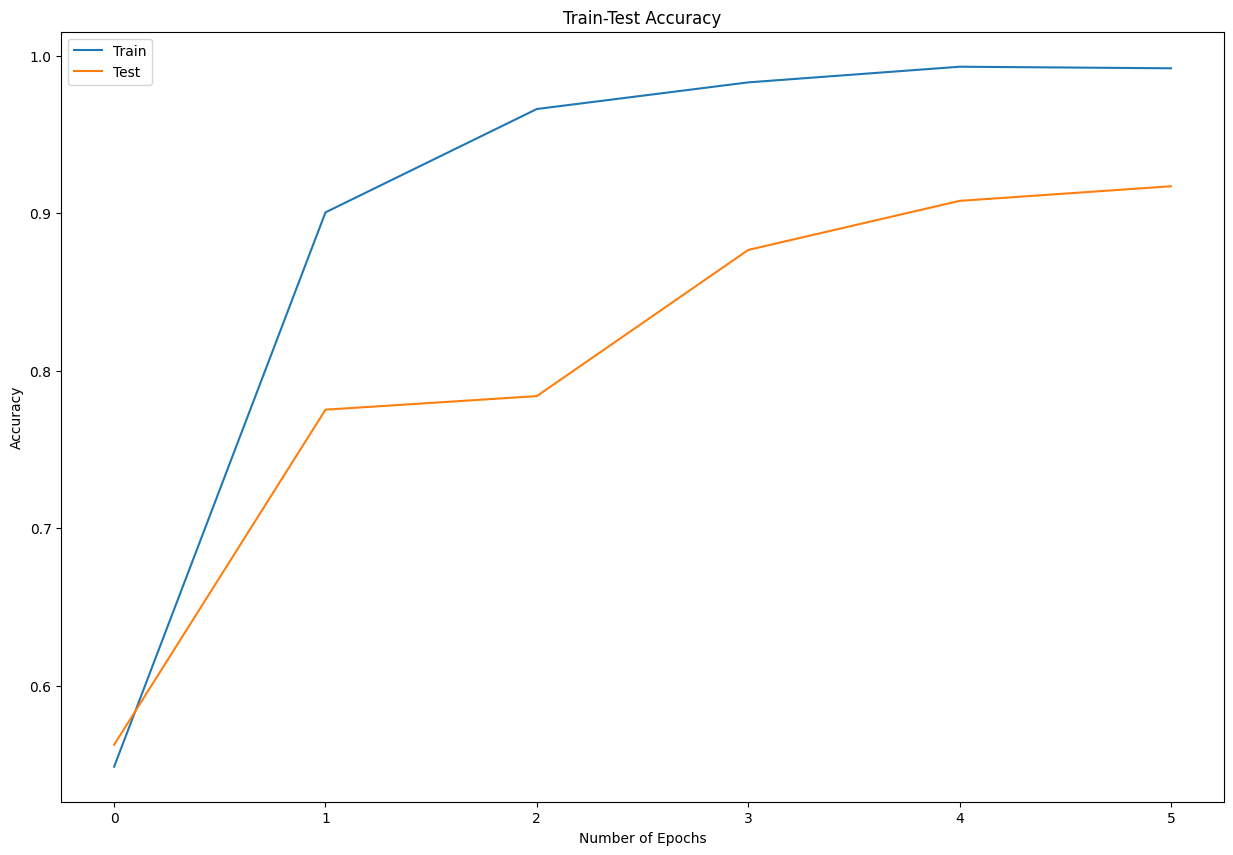

In [31]:
epochs= []
for i in range(6):
    epochs.append(i)
    
plt.figure(figsize = (15, 10))    
plt.plot(epochs,history.history['accuracy'], label="Train")
plt.plot(epochs,history.history['val_accuracy'], label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

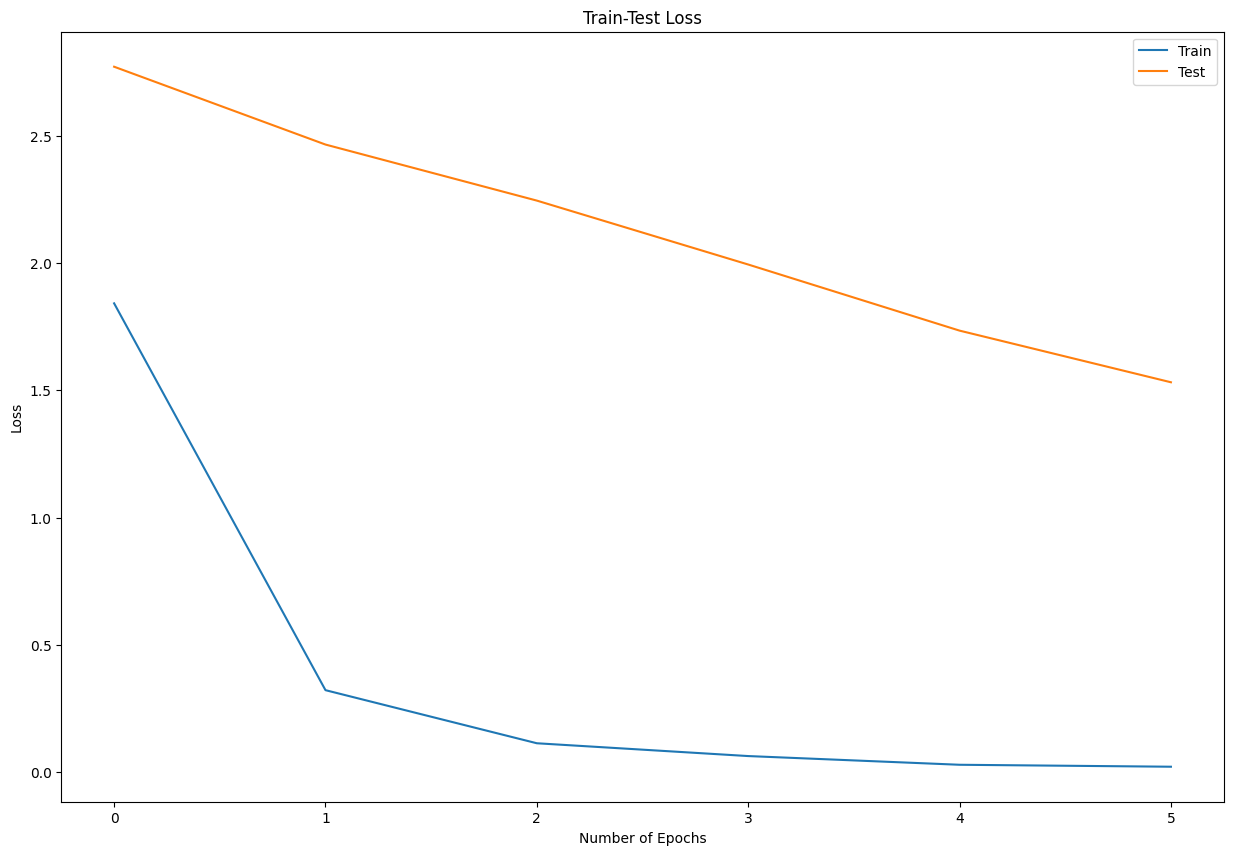

In [32]:
plt.figure(figsize = (15, 10))   
plt.plot(epochs,history.history['loss'], label="Train")
plt.plot(epochs,history.history['val_loss'], label="Test")
plt.title("Train-Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

actual vs predicted

In [ ]:
#list of categories/labels
folder_list

Predict vs. Actual Images

1/1 [==============================] - 0s 21ms/step


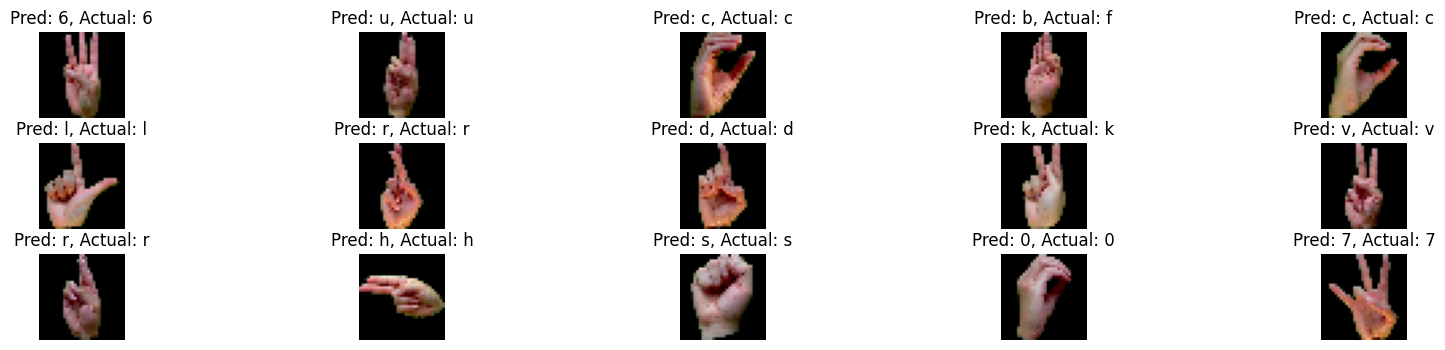

In [65]:
import numpy as np
import matplotlib.pyplot as plt
# choose a random subset of 15 images from the test set
np.random.seed(1)
indices = np.random.choice(len(X_test), 15, replace=False)
label_pred_probability= model.predict(X_test[indices]) #predicting labels number
label_pred = [np.argmax(x) for x in label_pred_probability] # predicting labels


#display the images and their labels
fig, axs = plt.subplots(3, 5, figsize=(20, 4))
fig.subplots_adjust(hspace=0.3)

axs = axs.flatten()

#Loop through the selected images and plot them in the subplots
#enumerate allows you to keep track of location (i)
for i, idx in enumerate(indices):
    axs[i].imshow(cv2.cvtColor(X_test[idx],cv2.COLOR_BGR2RGB ))
    axs[i].axis('off')
    predicted_label = folder_list[label_pred[i]]
    actual_label = folder_list[np.argmax(y_test[idx])]
    axs[i].set_title(f"Pred: {predicted_label}, Actual: {actual_label}")
  

# show the plot
plt.show()

Print thank you (for last slide)

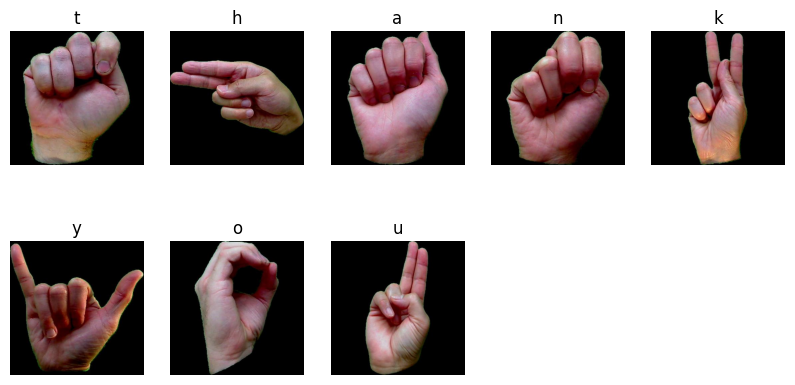

In [92]:
#Print thank you

fig, ax = plt.subplots(2, 5, figsize=(10, 5))

thanks = ["t","h","a","n","k", "y","o","u"]


for i, thank in enumerate(thanks):
  img_classes = os.path.join(path, thank)
  img = os.listdir(img_classes)[np.random.randint(0, 10)]
  img_path = os.path.join(path,thank,img)
  image = cv2.imread(img_path)
  ax = ax.flatten()
  ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  ax[i].set_title(thank)
  ax[i].axis('off')

  # Remove unused subplots
for i in range(8,10):
    fig.delaxes(ax[i])
